# Biolerplate

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.vigenere import *
from cipher.playfair import *
from cipher.autokey import *
from cipher.column_transposition import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

In [3]:
ca = open('aa.ciphertext').read()
cb = open('ab.ciphertext').read()
sca = ca.strip()
scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

In [4]:
history_words = [w.strip() for w in open('history-words.txt')]
len(history_words)

8197

In [5]:
history_transpositions = collections.defaultdict(list)
for word in history_words:
    history_transpositions[transpositions_of(word)] += [word]

# Part A

In [6]:
len(sca)

22545

In [7]:
len(sca) / 7

3220.714285714286

In [8]:
ca5c = [int(c, 2) for c in chunks(sca, 5)]
ca5c[:5]

[8, 8, 4, 17, 15]

In [9]:
max(ca5c), min(ca5c)

(25, 0)

In [10]:
cal = [string.ascii_lowercase[int(c, 2)] for c in chunks(sca, 5)]
catj = cat(cal)
catj

'iierpfblvnjgtbrdncqtncvrimuoccxprrvguebucboboejcfvyakcsqjajnsmgtpqvzrnfuupntycqtnnecebbccyjughvrbjyewmspvsfdgqpejmimfuxefageuufzrmftfbuedylmeseynmclrrfiadupjtytycsmvtnytrhskyterlcfflvdkfflrmfjjbvoeaiiegvubayieiflgorufjbfdcdpnnzabtqekmoigoiqbvqackpagaewpbueibjzrckgpvjoljepnvvbjaguizflntccbagoecpnghvkuprmraiqaeiwxifocbbvqtycticpvpterrvlupnpgwxwekzlhevtygujhtdcdpnnzabtzetfbvvsdqdiabvcbaveirpebrbujbutyyomyetrswaitqbalolabvfevfpervvpzbuieejapoelfkgeuykcqitgpcfdfqfwsslnfztllcgqkeukpagowrimzetfbvvsdqjvclrafrhskjfiiieevajikfuprpimctrmfdxpntkmewjikfbpragmgwydrlecaskyctreonmwfimctvbrdymtlwvupcydyywmclraflbnvmsbjofdpceonlemgoeyuwesrlexncbcewhtkffxyatcxqghjyoloaxqbvqbicfhrbcmdsftfapvgazlupreonmwfiflbvqikfjvxemcopnriwnqthkfbdrbvcokbnmgokrdkfbbghrrjajhrrxmfhfsmlqozlupvstytmouksonbrksoigecwupreonmwfimcterrvlpbghvmotltygoojetmvtqsvcjvfiucuprsrdfavtkgoohnucsbuedubanscgnjyaticwbkncdwhluluarerlzlrtrgmaoukfbdvnxepbghzqgieikqfmzeuasimykmemftimzqgaewupvnxriqfwvjmxeokcdbrddstbuamccmrnzkqwetrluigsfkfbvmvyolj

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


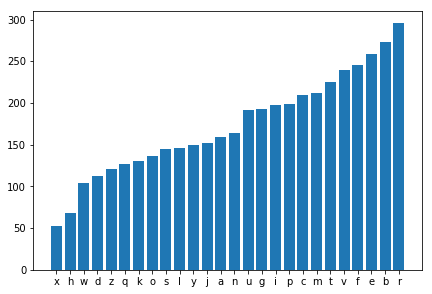

In [11]:
fc = collections.Counter(catj)
plot_frequency_histogram(fc, sort_key=fc.get)

In [12]:
key_a, score = vigenere_frequency_break(catj)
key_a

'binary'

In [13]:
print(prettify(vigenere_decipher(catj, key_a)))

harry had insisted we place the hole where it wouldnt be seen later i was pretty sure now that he
planned to claim the table for his office so he suggested we remove the makers nameplate and drill
there it was just as well he did the demolition charge was linked to a web of mechanical detonators
and almost any other direction would have disturbed atleast one of them the machinery was old and
the sappers werent happy working with it but mechanical mechanisms can be easier to work with than
electronics as you can see how everything is connected a judicious dose of superglue fixed most of
the mechanisms in place just leaving us with the problem of what to do with a heap of old and
unstable explosives normally we would have placed one or two of our own detonators and packed out
the place with sandbags and breeze blocks to contain the explosion and i think even harry might have
been convinced that that is what we should do in this case but unfortunately the explosives were not
the only thin

In [29]:
open('aa.plaintext', 'w').write(prettify(vigenere_decipher(catj, key_a)))

5517

# Part B

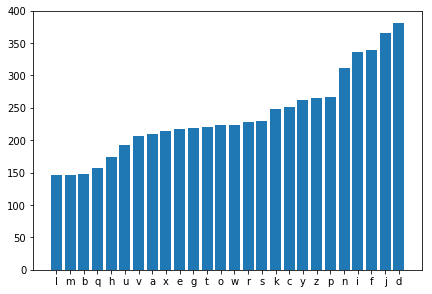

In [14]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [15]:
key_b, score = vigenere_frequency_break(scb)
key_b

'bqknmvrbqpnmvr'

In [16]:
vb = vigenere_decipher(scb, key_b)
vb[:100]

'scjwosootzadaicifetcceoiaebtdtbbdotgahlxaicorengoftzatclnfutoikivtxhskscwwmntoehnhxdgrsuqxbscsatxdlx'

In [17]:
key_b, score = vigenere_frequency_break(cat(reversed(scb)))
key_b

'pqbrvmnkqbrvmn'

In [18]:
vb = vigenere_decipher(cat(reversed(scb)), key_b)
vb[:100]

'oeolcqkyoeosnealcuelqsbgiheeadihtrtgkowahknspcxbntfmtcrkgffnlcwutitlatancqdqnbsusttnoczvhuaethdhtqmc'

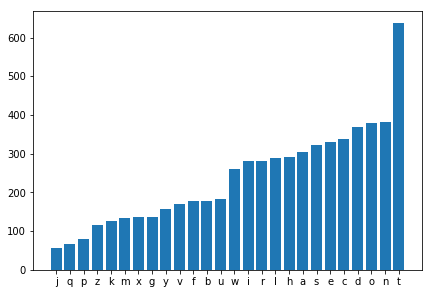

In [19]:
fc = collections.Counter(vb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [34]:
key_b, score = autokey_sa_break(scb)
key_b

'ijfvibqowmppztsvknoz'

In [37]:
playfair_break_mp(scb, wordlist=history_words, fitness=Ptrigrams)

(('confederation',
  <KeywordWrapAlphabet.from_largest: 3>,
  {'j': 'i'},
  'x',
  True),
 -32750.60854007092)

In [40]:
playfair_decipher(scb, 'confederation', padding_replaces_repeat=True)

'fkatnxosreoqzytvgonyfynzxhygzegeurhgpxztzyicgdvlokreonvncwolrildietfchfklrztgspzraqsaqnbfmkfqkonqsqcyndysynebabnlxnvvfxgcvwsueuecopqsytbsyerfkwhrayvazyluvzoynmwyihbrnsbkadttiuehzrawpxgynugmtuhiwylpqdturuenzxqhotudpswscoldcyhgazrhgfdweopcgetrlhxtfazqwsveszadzxipyaxqxyqynmuhszwnxqssikzcslfxmwqezitieyzgzrzbcenmplrvitfziwtchyfmbboknaigsroamzoeraialaubhahfvokbttdeavxvovxrlabavauevkahraseqitfioeupvbltviidzetxtuezeraialaucheyxkrnqzaiouoxxgynswzfigwgzserdultfyclbrenmpzotmxiksoukscrivbyvbzdrhpyyficqozpdtolzfvwxgxqxqukzeaemseuurfnnziwfhbdhuurteftexavkqvaqtimdtxinbitezmrsyrzbnontqzwezhgalpffgugbutmztikvtyhsdqxmoqdttexchfudrcpitezkowpsicydykcqzaeqsfghrosxwukzwzsfuvxaenfdybnqyluecmuweiaybdemihwxqoxciruxcezaztmbzazosuvtqkzrcsyhqflvgetphpezpcashshifhxxehrrmfqscvagdvlomqmfxepmzeuwxqktcwmylmrzgrkeqehvtyhektzacdceitnztmiwicvhgzagqxelxecmugfphlwofvyxwurvieieuzydlqodvzpuagheuriictvsczdrhfglazgvnxredvtukpirlrildierhqytdgtpwqzdtruhofiqxyxyzazauevbxaftxuewdfifaacnoavemiebnyghmvslwnfhsexoxkmxcmptfwzdifhurcop

In [44]:
playfair_break_mp(scb, fitness=Ptrigrams)

(('illegality', <KeywordWrapAlphabet.from_last: 2>, {'j': 'i'}, 'x', True),
 -32581.166965728567)

In [45]:
playfair_decipher(scb, 'illegality', padding_replaces_repeat=True)

'doiuzdhoufhsuxctoqmuitgwksqblaipolhfkqtluxbacqwdmiufmnrgpulezateiafbkddoeatlhqzvidozmvymdrodpnmnozkmumyuthmtnymynvgrtbvkcblhuauasfprthbnthfudorxidxvguwnnxqwumhpudmeiskhfyogatuagvidquvkumhvnapesxwnprogoluagwmzamaomchlknleycwmmpuehfbdusqxqttuaeskfbgurvhctougluszqzfmzmzrumrhbkuwzdozoivlnkbwwpvraltaiaxueveunctmopeasafblicpkdtixhxgfndchqxmbsqwfudclfeoemkpbtminbgofavbxbvbaeynczeodxfyegbofztaibmdkrgcfesacslaldaoalfudclfeokdnulyiszwdclqkzvkumhlblpgsotvfugffeitweactmopqwanszpdlqpdstashwgculgeqztibashvzogleblvwvkmzmzpalaafovauolikgwsxmhkcepolutbfdscznpzcnztzogszymtaalsytheumymnznuwalhflfrsqfhvghantlyitcwmfczmryngaadskdaqsgrftaalimquoihuyutkzwafozqfeghocvpauwtvaqvbafkiyumyrzzxtrrhuscdwhgtztxrmzkzablozhalguanvpguhonxznvltsthrwwbqetureofvzdakbkbbisksdegysdnknzccqwdyrrohdfozuauvcpntnphwnsyvecifzhatcwmhiltadycaiintlztxscbhfugyhsdnvtrrhfqreaxkavxcvolsaaiauuxetshybvzoefhauzabactknulgeqfflvergzetgtcpaxoaezateiagerzgomquqzwogloamibzmvdxugueodxypdflduaxpibfdadnmcztxiamyqbekchaxkibkdskzdqzhopfbwuscmholsfp

In [53]:
wb = [sanitise(w) for w in cb.split()]
revwb = [cat(reversed(w)) for w in wb]
revwb[:10]

['najtst',
 'pf',
 'noj',
 'xeftxfrpydzvp',
 'qhkjpoljekwqn',
 'jyw',
 'bzrbedzv',
 'gf',
 'noj',
 'evocxf']

In [30]:
list(sorted([(i, sum(index_of_coincidence(s) for s in every_nth(scb, i)) / i) for i in range(1, 20)], key=lambda p: -p[1]))

[(14, 1.8149082143679982),
 (7, 1.7876483819003524),
 (19, 1.139130739823884),
 (17, 1.13573597102418),
 (18, 1.134286347801864),
 (16, 1.1340666011499847),
 (15, 1.1267151614528168),
 (12, 1.1195770233467919),
 (13, 1.1170033049862185),
 (10, 1.1113107848108488),
 (11, 1.1048189745296602),
 (8, 1.1029139212676535),
 (9, 1.0992610408639947),
 (6, 1.0930448274541635),
 (5, 1.0887236952605512),
 (4, 1.0883432346550446),
 (3, 1.080300997704784),
 (2, 1.0772346205630585),
 (1, 1.0724609207862228)]

In [31]:
splits = every_nth(scb, 7)

In [41]:
split_keys = [simulated_annealing_break(s, fitness=Pletters, workers=30) for s in splits]

In [42]:
split_keys

[('jbgefzqtpklmvhdirawuocnyxs', -1091.5171683341368),
 ('thlusayeimnzkvdxprqjbwfgco', -1111.6585001154554),
 ('lzhvijedwmngbrcfapoxqtysku', -1096.256469009839),
 ('akqinpbrysuvmjgochfexldwzt', -1091.5681079945684),
 ('zwmgpslitbvnqafyejkdorxuch', -1096.8999003685785),
 ('stkgohqvclfdiyjarxmnzbpewu', -1111.829016643045),
 ('fvtrkghuyxqjsncipbwzedlamo', -1102.4516201102704)]

In [43]:
p_splits = [keyword_decipher(c, k) for  (c, (k, _)) in zip(splits, split_keys)]

In [44]:
print(lcat(tpack(repunctuate(combine_every_nth(p_splits), ptb).split())))

HEVNNT AI TSE EHTOGRHORCEHT, EMYEDTAPEOENS IIR HTOHMHAV AC TSE OROUNG ONLRACE; BITR HELNPMEIDIAIAHN.
BOR YAMH ECEO AHLK. TSIH IEWORT FON LOUPISNOOIEU PF TSE MAIEOYI OELHETONB TS IEYSST SH TSE
HTHMLAUSEN AND HLTACAAIES SB TSE JMOSA-HAUEGENDEOT AHTEWDNPENME NYEHLG, TRE NRIDSF OHLSHBE,
REIEOMTEH IEFESIED TN HH TRE IRLRNYE. TSE SEGNDA LAHTAAIO SEDNUUEOUOTANAH WSI IMTIAIS LNALEHHAIV TRE
ADMDIGE, AH BEDD OS I TUMCOIC NM DENSOIO DEOINER YISY IIHDVNOH NM ITN ALAIGNTOET. IT OLSO MSOTOONT H
PIAEF TUMCOIC NM TRE LWRNEHT AHTETS SB TSE NIDRAPE NHU IEMSMCEHMOTIAIS IT TA TRE WTE AI UOHYSHOL NF
ADASE AHTETS. TRE TDNUSP IRLRNYE AT HO NIDEYEOUEHT HATELUACEOLE AYEALV NET WF PV TRE YNIGOTE
TELIETIRY TA RED UHXENTC JUEEI CAMTAIAA AI TRE LATE EIYRTEEATR DENAUSV. AT GOO ESTAPLIHRED TN
LAHUMLA OWIYEALWNHDE IIR TA DADRY AMT LOPEST UOVLSMOTOL OLTNSHH DEHNPHED TA WMITSES TRE AITEIESTT SY
REI UOXESTK’H CSGEHHUEAT, FRORE FSAYOMHAV OI EREPEHT NF YWNMNOPLE UEIOIVIDNTK AI TRE ECEIT TROT AAO
NLTOBHTIEN PERE UNNLOPESEU

In [48]:
split_counts = [collections.Counter(s) for s in splits]
split_maps = [{c: p for ((c, _), (p, _)) in zip(s.most_common(), english_counts.most_common())} for s in split_counts]
split_maps

[{'f': 'e',
  'u': 't',
  'd': 'o',
  'j': 'a',
  'p': 'i',
  'h': 'n',
  'w': 'h',
  't': 's',
  'a': 'r',
  'e': 'd',
  'm': 'l',
  'o': 'u',
  'v': 'm',
  'n': 'w',
  'x': 'y',
  'g': 'c',
  'z': 'f',
  'q': 'g',
  'i': 'p',
  'b': 'b',
  'c': 'v',
  'l': 'k',
  'y': 'x'},
 {'s': 'e',
  'j': 't',
  'd': 'o',
  'i': 'a',
  't': 'i',
  'v': 'n',
  'q': 'h',
  'e': 's',
  'r': 'r',
  'u': 'd',
  'z': 'l',
  'b': 'u',
  'k': 'm',
  'f': 'w',
  'l': 'y',
  'c': 'c',
  'a': 'f',
  'y': 'g',
  'x': 'p',
  'h': 'b',
  'w': 'v',
  'n': 'k',
  'g': 'x',
  'm': 'j'},
 {'i': 'e',
  'x': 't',
  'l': 'o',
  'c': 'a',
  'w': 'i',
  'r': 'n',
  'd': 'h',
  'o': 's',
  'p': 'r',
  'v': 'd',
  'g': 'l',
  'q': 'u',
  'b': 'm',
  'y': 'w',
  'h': 'y',
  'k': 'c',
  'e': 'f',
  'j': 'g',
  'f': 'p',
  't': 'b',
  'z': 'v',
  's': 'k',
  'n': 'x',
  'm': 'j'},
 {'n': 'e',
  'a': 't',
  'e': 'o',
  'g': 'a',
  'y': 'i',
  'j': 'n',
  'r': 'h',
  'f': 's',
  'h': 'r',
  'i': 'd',
  'v': 'l',
  'x': 'u',
 

In [74]:
split_trans = [''.maketrans(sm) for sm in split_maps]
split_plain = [s.translate(st) for (s, st) in zip(splits, split_trans)]
split_plain;

In [76]:
# print(repunctuate(combine_every_nth(split_plain), ptb))

In [71]:
def repack(punctuation):
    def ischar(elem):
        return elem in ['UPPER', 'LOWER']
    
    repacked = []
    for p, np in zip(punctuation, (punctuation[1:] + [' '])):
        if ischar(p):
            if ischar(np):
                repacked += [p, ' ']
            elif np == ' ':
                repacked += [p, '*']
            else:
                repacked += [p, np]
#         elif p == ' ':
#             repacked += ['*', ' ']
    return repacked
        

In [72]:
repunctuate('abcd', repack(['UPPER', 'UPPER', ';', ' ', 'UPPER', 'UPPER', ' ', 'UPPER']))

'A B;C D*'

In [81]:
ms = '   ' + cat(p[0] for p in english_counts.most_common()) +'\n'
for i, c in enumerate(split_counts):
    ms += '{}: {}\n'.format(i, cat(p[0] for p in c.most_common()))
print(ms)

   etoainhsrdlumwycfgpbvkxjqz
0: fudjphwtaemovnxgzqibcly
1: sjditvqeruzbkflcayxhwngm
2: ixlcwrdopvgqbyhkejftzsnm
3: naegyjrfhivxmdzqbpokluws
4: pdfztakijgnoqxcsmywlrvub
5: onjscymxvgdzipwhkqatbfelr
6: kzcfynwubrjeslmtghivdqa



In [48]:
split_counts = [collections.Counter(s) for s in splits]
split_maps = [{c: p for ((c, _), (p, _)) in zip(s.most_common(), english_counts.most_common())} for s in split_counts]
split_maps

[{'f': 'e',
  'u': 't',
  'd': 'o',
  'j': 'a',
  'p': 'i',
  'h': 'n',
  'w': 'h',
  't': 's',
  'a': 'r',
  'e': 'd',
  'm': 'l',
  'o': 'u',
  'v': 'm',
  'n': 'w',
  'x': 'y',
  'g': 'c',
  'z': 'f',
  'q': 'g',
  'i': 'p',
  'b': 'b',
  'c': 'v',
  'l': 'k',
  'y': 'x'},
 {'s': 'e',
  'j': 't',
  'd': 'o',
  'i': 'a',
  't': 'i',
  'v': 'n',
  'q': 'h',
  'e': 's',
  'r': 'r',
  'u': 'd',
  'z': 'l',
  'b': 'u',
  'k': 'm',
  'f': 'w',
  'l': 'y',
  'c': 'c',
  'a': 'f',
  'y': 'g',
  'x': 'p',
  'h': 'b',
  'w': 'v',
  'n': 'k',
  'g': 'x',
  'm': 'j'},
 {'i': 'e',
  'x': 't',
  'l': 'o',
  'c': 'a',
  'w': 'i',
  'r': 'n',
  'd': 'h',
  'o': 's',
  'p': 'r',
  'v': 'd',
  'g': 'l',
  'q': 'u',
  'b': 'm',
  'y': 'w',
  'h': 'y',
  'k': 'c',
  'e': 'f',
  'j': 'g',
  'f': 'p',
  't': 'b',
  'z': 'v',
  's': 'k',
  'n': 'x',
  'm': 'j'},
 {'n': 'e',
  'a': 't',
  'e': 'o',
  'g': 'a',
  'y': 'i',
  'j': 'n',
  'r': 'h',
  'f': 's',
  'h': 'r',
  'i': 'd',
  'v': 'l',
  'x': 'u',
 

In [82]:
# chunks(repunctuate(combine_every_nth(split_plain), repack(ptb)), 14)
print(lcat(tpack(repunctuate(combine_every_nth(split_plain), ptb).split())))

SEBNNT AI TSE ERTOGRHOSCEST, EMYEDTOPEOENH IIR RTOSMHAV AC TSE OSOUNF ANLRAYE; BITR SELNGMEIDITIASN.
BAR YAMS EYEO ASLK. TSIR IEWART CON LAUGIHNOAIEU PF TSE MAIEOCI OELSETANB TH AEYHHT HS TSE
RTSMLTUHEN IND SLTAYOTIEH HB TSE JMOHO-HAUEGENDEOT ASTEWDNPENME NYESLF, TSE NRIDHC OSLSHPE,
REAEAMTES AEGEHIED TN SR TRE IRLSNYE. TSE HEGNDT LASTIOIO HEDNUUEOUOTONAR WHA IMTIAIH LNALESSOIV TRE
IDMDIGE, IH BEDD OH I OUMCOAY NM DENHAIO DEOANER YIHC IISDVNOH NM ITN ILTIGNTOEO. IT OLHA MHOTOONO S
PIAEG OUMCOAY NM TRE LWRNEST IHOETH HB TSE NIDROPE NSU AEMHMCESMATIAIH IO TA TRE WOE AI UOHYHROL NG
TDAHE IHOETH. TRE ODNUHP IRLSNYE OO SO NIDEYEOUEST HATELUOCEOLE ICEALV NET WC PV TRE YNIGOTE
OELIETIRY TA RED USXENTY JUEEI YOMTAIAI OI TSE LITE EIYRTEEATR DENTUHV. AT FAO EHTIPLIRRED TN
LASUMLT OWIYEOLWNSDE IIR TA DIDRY AMT LAPEHT UOBLHMOTOL ALTNHSH DERNPSED TA WMATSEH TRE OITEIEHTO HY
REA UAXEHTK’H CHGESSUEAT, FRORE CHAYOMHAV OI EREGEST NG YWNMNOPLE UEIOIVIDNTK OI TSE EYEIT TROT OTO
NLTOVHTIEN PERE UNNLAPEHEU

In [129]:
chunks(repunctuate(combine_every_nth(split_plain), repack(ptb)), 56)

['S E B N N T*A I*T S E*E R T O G R H O S C E S T,E M Y E ',
 'D T O P E O E N H*I I R*R T O S M H A V*A C*T S E*O S O ',
 'U N F*A N L R A Y E;B I T R*S E L N G M E I D I T I A S ',
 'N.B A R*Y A M S*E Y E O*A S L K.T S I R*I E W A R T*C O ',
 'N*L A U G I H N O A I E U*P F*T S E*M A I E O C I*O E L ',
 'S E T A N B*T H*A E Y H H T*H S*T S E*R T S M L T U H E ',
 'N*I N D*S L T A Y O T I E H*H B*T S E*J M O H O-H A U E ',
 'G E N D E O T*A S T E W D N P E N M E*N Y E S L F,T S E*',
 'N R I D H C*O S L S H P E,R E A E A M T E S*A E G E H I ',
 'E D*T N*S R*T R E*I R L S N Y E.T S E*H E G N D T*L A S ',
 'T I O I O*H E D N U U E O U O T O N A R*W H A*I M T I A ',
 'I H*L N A L E S S O I V*T R E*I D M D I G E,I H*B E D D*',
 'O H*I*O U M C O A Y*N M*D E N H A I O*D E O A N E R*Y I ',
 'H C*I I S D V N O H*N M*I T N*I L T I G N T O E O.I T*O ',
 'L H A*M H O T O O N O*S*P I A E G*O U M C O A Y*N M*T R ',
 'E*L W R N E S T*I H O E T H*H B*T S E*N I D R O P E*N S ',
 'U*A E M H M C E S M A 

In [84]:
split_keys_affine = [affine_break(s) for s in splits]
split_keys_affine

[((25, 9, True), -1226.7606628204894),
 ((11, 7, True), -1260.344065012207),
 ((25, 17, True), -1285.2666386878766),
 ((25, 19, True), -1233.0406991946986),
 ((23, 2, True), -1286.699132753805),
 ((1, 21, True), -1248.1083921858865),
 ((1, 17, True), -1242.3820605977833)]

In [86]:
a_splits = [affine_decipher(c, m, a, o) for  (c, ((m, a, o), _)) in zip(splits, split_keys_affine)]
a_splits

['osecdaebtyosaovcaaicolloayleryzcaocochkrndelsocceeaelaanveyecnldtcshtvcnlkscvcanechasyvhdynctkddntnlzmhccnohksnasncenaatleynhcahnyzndmayengdgosncconssocsmooclsccnecocolelinncyyicnynclsdsdbeeuctsjulcugscmnssesweonscclaceaysceoeleoccoyynlolznahruobvdmkoctnoavsegmhaanecclemyeeeedcsyyscnaetchccsecasrseuasllnyyannynelydytccseeancdegbigsvoccylilnnfstonocvccicyaccumgzzunaoncvcncetesydbravdeochkolnacahsuhlymnhycbyeencnksmlichhlinvrivhllchmmdrchnctlsnyyfcycyesrtwngnnhcahluycahlvvzndlcthlgazcyaoeseryvzlcnuoonckljcwnomunklulsdeuecczcadclnveynlyechoddvebeoesavrlhulsfbyvnvyeddorbzssanecscoocnhnynoyedvcoaddnvytvlyhcnbscvnlkacnnnacesbzcsblcyaeoclhnjuoadyidnyeunmchfvuclctblailaenakndmnennndgdnenlncdnoecaeseclvycolyysonydaohnmtyentenhodrohkeeycanlshidaiymjssofeydncooockehhcltwekybizotshsysckniacesgyaytcsyccaacfvtikenneeceavonwugclmlhhdtsafmdetbyansarnlvcetoncyatcvsnanyossackzhmeybursyaecs',
 'tednehneyqtfstcgwueutlnxmqshtntnawllfttymyelhnmmhlhlbumuhutlwmsalnhtuymaktfnimtaeeteqmmetemfxttmwuunnlthlcnuu

In [87]:
print(lcat(tpack(repunctuate(combine_every_nth(a_splits), ptb).split())))

OTWIIS OS EBE DAIEDAAPCCCNS, EUBTDEEDDOTAH TTF AIENOARG OB EBE PCLTYL LIIKYQH; HTSK OTJIANTSFTRTXDA.
SNK QXBO TIEP XDVC. SMTA HCGNKH MLA WNUAHFAUNTDE RI EBE UXHCUFT PTSOTSLIY IL LHSWRI LN SMD
AIOXJRMRTA MYJ OIIYQERTTF LS SMD QBEHE-ARETRTYJDOI YNSEJLWZTYFD DVCNJQ, HCT AATJWM LOWBAST,
KCLHLUSTO LHCDRHCF SI OA IHT TKVCWKT. SMD RTRYUR VXDNMETP RTDYZUDONEEEIRA ULL TFHHOSH JIRITONETL SKC
MUFGHQC, MM HDLA EH T NMNCELI IU LTAHNTP LTELYEF BHLB TTOLMAUM IU HIA MJRTVWNUHN. TS LVHN FWOIEUYN O
FHYTG NMNCELI IU SKC WRKITDN MMNDSF LS SMD DHDAEDD DDT LHFWNCCNOLHHOSH TN HX IHT RND XH TUMSWALV YG
RGXFC MMNDSF. NAH NGDNLK TKVCWKT EN OO WSFHSDONCNS ARSTVIEBDOSC MFERIM ATS OC FM NAH SIHQEEH
NDIHCETKQ SO HTU UOJTAEI ZMTTS QEFHXHYM ET HCT VMSE DHVHEHERSK DTYRMRM. YE LLP TFNMKWTAKCF SI
VXDTXJR PUHKTEWJDDDT TTF SO DMUKQ XBN WNDDRI TUWWWNLNUJ LVSWLNM JDAWZNHJ HX UMLSMDR IHT ETHTHCHSN WB
KCL ZLKTFNC’M BWVTONZERS, PHUAE CROKUOARG LS TAEATDN YG SJDBAUKWD ETSUTGTLWNC ET HCT CQHTH SKEE ERP
DSNUQAHHTA KHKD EWAWNDDRTT

In [88]:
def split_decipher(split_message, pt_alpha, ct_alphas):
    split_maps = [{c: p for (c, p) in zip(pt_alpha, cta)} for cta in ct_alphas]
    split_trans = [''.maketrans(sm) for sm in split_maps]
    split_plain = [s.translate(st) for (s, st) in zip(splits, split_trans)]
    return combine_every_nth(split_plain)

In [105]:
def split_swap(ct_alphas):
    k = random.randrange(len(ct_alphas))
    i = random.randrange(26)
    j = gaussian_swap_index(i)
    swapped_key = ct_alphas[k]
    if i > j:
        i, j = j, i
    if i != j:
        swapped_key = (swapped_key[:i] + swapped_key[j] + swapped_key[i+1:j] + swapped_key[i] +
                    swapped_key[j+1:])
    return ct_alphas[:k] + [swapped_key] + ct_alphas[k+1:]

In [115]:
def split_sa_worker(message, plain_alphabet, cipher_alphabets, 
                                     t0, max_iterations, fitness,
                                     logID):
    temperature = t0

    dt = t0 / (0.9 * max_iterations)
    
    current_key = cipher_alphabets
    key = current_key
    plaintext = split_decipher(message, plain_alphabet, key)
    current_fitness = fitness(plaintext)

    best_key = current_key
    best_fitness = current_fitness
    best_plaintext = plaintext
    
    # print('starting for', max_iterations)
    for i in range(max_iterations):
        key = split_swap(current_key)
        plaintext = split_decipher(message, plain_alphabet, key)
        new_fitness = fitness(plaintext)
        try:
            sa_chance = math.exp((new_fitness - current_fitness) / temperature)
        except (OverflowError, ZeroDivisionError):
            # print('exception triggered: new_fit {}, current_fit {}, temp {}'.format(new_fitness, current_fitness, temperature))
            sa_chance = 0
        if (new_fitness > current_fitness or random.random() < sa_chance):
            # logger.debug('Simulated annealing: iteration {}, temperature {}, '
            #     'current alphabet {}, current_fitness {}, '
            #     'best_plaintext {}'.format(i, temperature, current_alphabet, 
            #     current_fitness, best_plaintext[:50]))

            # logger.debug('new_fit {}, current_fit {}, temp {}, sa_chance {}'.format(new_fitness, current_fitness, temperature, sa_chance))
            current_fitness = new_fitness
            current_key = key
            
        if current_fitness > best_fitness:
            best_key = current_key
            best_fitness = current_fitness
            best_plaintext = plaintext
        if i % 500 == 0:
            logger.debug('Simulated annealing worker {}: iteration {}, temperature {}, '
                'current c alphas {}, plain alphabet {}, current_fitness {}, '
                'best_plaintext {}'.format(logID, i, temperature, current_key, plain_alphabet,
                current_fitness, plaintext[:50]))
        temperature = max(temperature - dt, 0.001)

    return best_key, best_fitness # current_alphabet, current_fitness

In [125]:
def split_sa(message, plain_alphabet, cipher_alphabets,
                  workers=10, 
                  initial_temperature=200,
                  max_iterations=20000,
                  fitness=Ptrigrams, chunksize=1):
    worker_args = []
    ciphertext = sanitise(message)
    for i in range(workers):
        worker_args.append((ciphertext, plain_alphabet, cipher_alphabets, 
                            initial_temperature, max_iterations, fitness,
                            i))
#     print(worker_args)
    with multiprocessing.Pool(10) as pool:
        breaks = pool.starmap(split_sa_worker,
                              worker_args, chunksize)
    return max(breaks, key=lambda k: k[1])

In [126]:
pt_alpha = cat(l[0] for l in english_counts.most_common())
split_counts = [collections.Counter(s) for s in splits]
split_alphas = [cat(deduplicate(cat(c[0] for c in sc.most_common())
                            + pt_alpha))
                            for sc in split_counts]
split_alphas

['fudjphwtaemovnxgzqibclysrk',
 'sjditvqeruzbkflcayxhwngmop',
 'ixlcwrdopvgqbyhkejftzsnmau',
 'naegyjrfhivxmdzqbpokluwstc',
 'pdfztakijgnoqxcsmywlrvubeh',
 'onjscymxvgdzipwhkqatbfelru',
 'kzcfynwubrjeslmtghivdqaopx']

In [127]:
10**8

100000000

In [136]:
int(2e6)

2000000

In [137]:
key_b, score = split_sa(scb, pt_alpha, split_alphas, max_iterations=int(2e6), workers=20)
key_b, score

(['crdhgmszjaktloxbefnwuqvipy',
  'najgryfehivdxkbmpqzlouwtsc',
  'wphqekyxnsizjauobcldrgtfmv',
  'szvtderqiubkcxnjhafylwmogp',
  'jiuracqpgtwzbvmyshexkoldfn',
  'zyebmtwoxcqjrfaiklugsphnvd',
  'dmzxbivulyfngsraowjhpeqckt'],
 -20379.803672616308)

In [133]:
print(repunctuate(split_decipher(scb, pt_alpha, key_b), ptb))

REPORT ON THE ESTABLISHMENT, EFFECTIVENESS AND STANDING OF THE SHADOW ARCHIVE; WITH RECOMMENDATIONS. FOR YOUR EYES ONLY.
THIS REPORT WAS COMMISSIONED BY THE FOREIGN SECRETARY TO REPORT ON THE STRUCTURES AND ACTIVITIES OF THE QUASI-INDEPENDENT INTELLIGENCE AGENCY, THE SHADOW ARCHIVE, HEREAFTER REFERRED TO AS THE ARCHIVE. THE REPORT CONTAINS RECOMMENDATIONS FOR ACTIONS CONCERNING THE ARCHIVE, AS WELL AS A SUMMARY OF LESSONS LEARNED FROM ANALYSIS OF ITS ACTIVITIES. IT ALSO CONTAINS A BRIEF SUMMARY OF THE CURRENT ASSETS OF THE ARCHIVE AND RECOMMENDATIONS AS TO THE USE OR DISPOSAL OF THOSE ASSETS.
THE SHADOW ARCHIVE IS AN INDEPENDENT INTELLIGENCE AGENCY SET UP BY THE PRIVATE SECRETARY TO HER MAZESTY QUEEN VICTORIA IN THE LATE EIGHTEENTH CENTURY. IT WAS ESTABLISHED TO CONDUCT SURVEILLANCE AND TO CARRY OUT COVERT DIPLOMATIC ACTIONS DESIGNED TO FURTHER THE INTERESTS OF HER MAZESTY’S GOVERNMENT, WHILE PROVIDING AN ELEMENT OF PLAUSIBLE DENIABILITY IN THE EVENT THAT ITS ACTIVITIES WERE DISCOVERED

In [138]:
open('ab.plaintext', 'w').write(repunctuate(split_decipher(scb, pt_alpha, key_b), ptb))

7503